In [2]:
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

df_spbu = pd.read_csv("posts_SPbU.csv")
df_mgu = pd.read_csv("posts_MGU.csv")
date_time = datetime(2023, 3, 13, 0, 0)
start_time = int(time.mktime(date_time.timetuple()))
df_spbu.head()

,post_id,from_id,likes,reposts,text,comments,views,date
0,4293,-194548696,20,2,🏆Покоряем вершину [club202446718|«ТехноОлимпа»...,0,593,1681405203
1,10543,-7488307,12,1,"#КарточкиВожатого \n\nВо вторник мы узнали, ка...",0,116,1681405203
2,52282,-52298374,17,3,"Губы тирекса, мозги сеймурии и диметродона, а ...",0,2413,1681399620
3,5914,-105699871,11,1,Всегда восхищался буддийскими монахами? Переры...,0,121,1681398242
4,2447,-176553372,21,3,"⚡СОБРАНИЕ⚡\n\nРады объявить, что завтра пройдё...",1,195,1681398001


Количество публикаций за мксяц c 13.03.2023 00:00:00 по 13.04.2023, 20:00:03

In [3]:
df_spbu = df_spbu[df_spbu.date > start_time]
df_mgu = df_mgu[df_mgu.date > start_time]
print(f"spbu: {len(df_spbu)}")
print(f"mgu: {len(df_mgu)}")

spbu: 484
mgu: 706


Количество пользователей

In [4]:
print(f"spbu: {len(df_spbu[df_spbu.from_id > 0].from_id.unique())}")
print(f"mgu: {len(df_mgu[df_mgu.from_id > 0].from_id.unique())}")

spbu: 35
mgu: 131


Количество групп

In [5]:
print(f"spbu: {len(df_spbu[df_spbu.from_id < 0].from_id.unique())}")
print(f"mgu: {len(df_mgu[df_mgu.from_id < 0].from_id.unique())}")

spbu: 94
mgu: 185


Количество публикаций в день за месяц

In [6]:
df_spbu["simple_date"] = pd.to_datetime(df_spbu['date'], unit='s').dt.date
df_mgu["simple_date"] = pd.to_datetime(df_mgu['date'], unit='s').dt.date
df_spbu.head()


,post_id,from_id,likes,reposts,text,comments,views,date,simple_date
0,4293,-194548696,20,2,🏆Покоряем вершину [club202446718|«ТехноОлимпа»...,0,593,1681405203,2023-04-13
1,10543,-7488307,12,1,"#КарточкиВожатого \n\nВо вторник мы узнали, ка...",0,116,1681405203,2023-04-13
2,52282,-52298374,17,3,"Губы тирекса, мозги сеймурии и диметродона, а ...",0,2413,1681399620,2023-04-13
3,5914,-105699871,11,1,Всегда восхищался буддийскими монахами? Переры...,0,121,1681398242,2023-04-13
4,2447,-176553372,21,3,"⚡СОБРАНИЕ⚡\n\nРады объявить, что завтра пройдё...",1,195,1681398001,2023-04-13


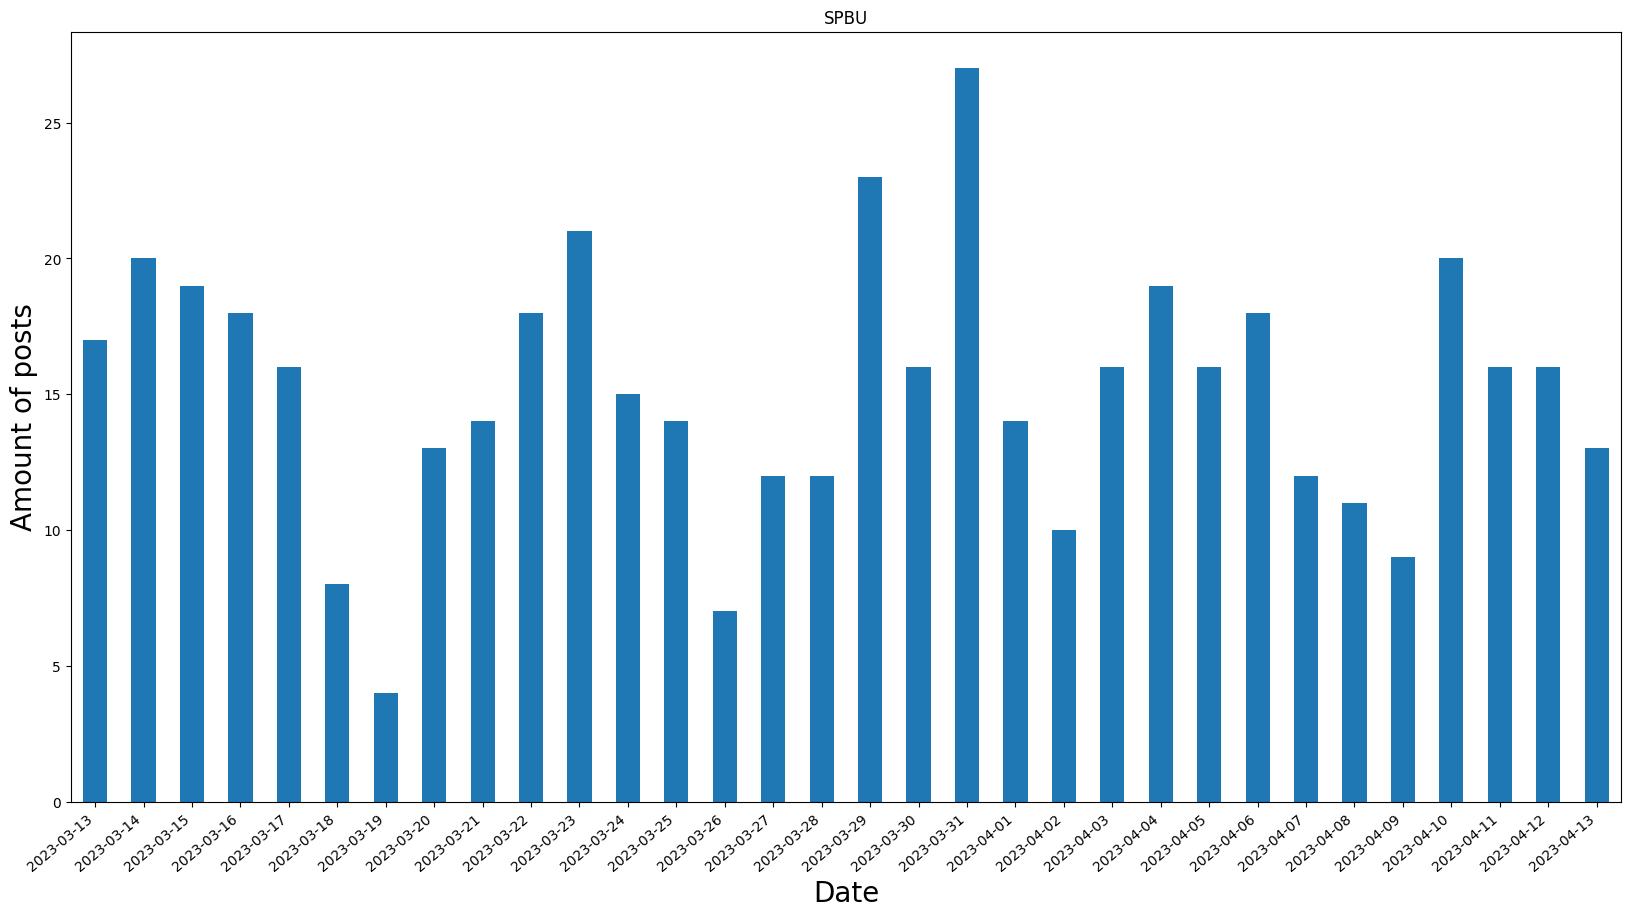

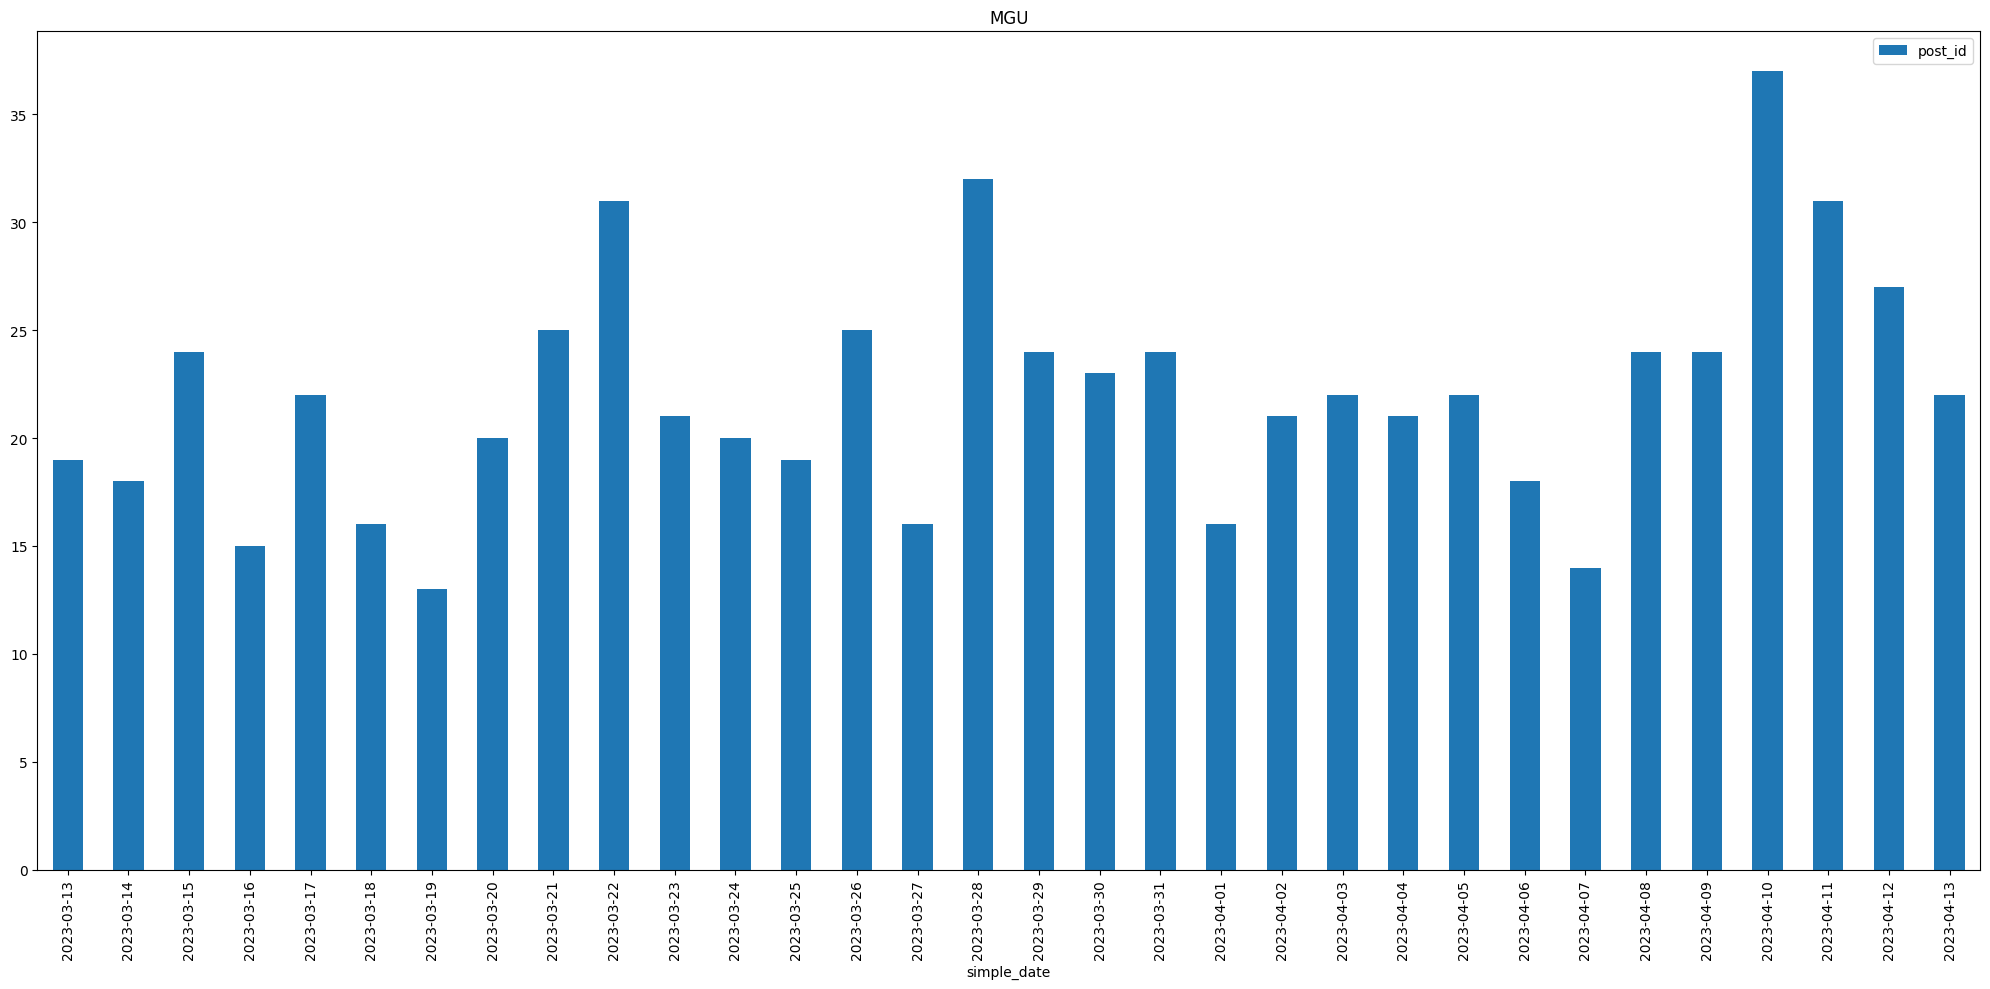

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
gr = df_spbu.groupby(df_spbu.simple_date).count().reset_index()
ax = gr.plot(x='simple_date', y='post_id', kind="bar", legend=False, title='SPBU')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel="Date", ylabel = "Amount of posts")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)


gr1 = df_mgu.groupby(df_mgu.simple_date).count().reset_index()
gr1.plot(x='simple_date', y='post_id', kind="bar", title='MGU')

plt.tight_layout()

plt.show()


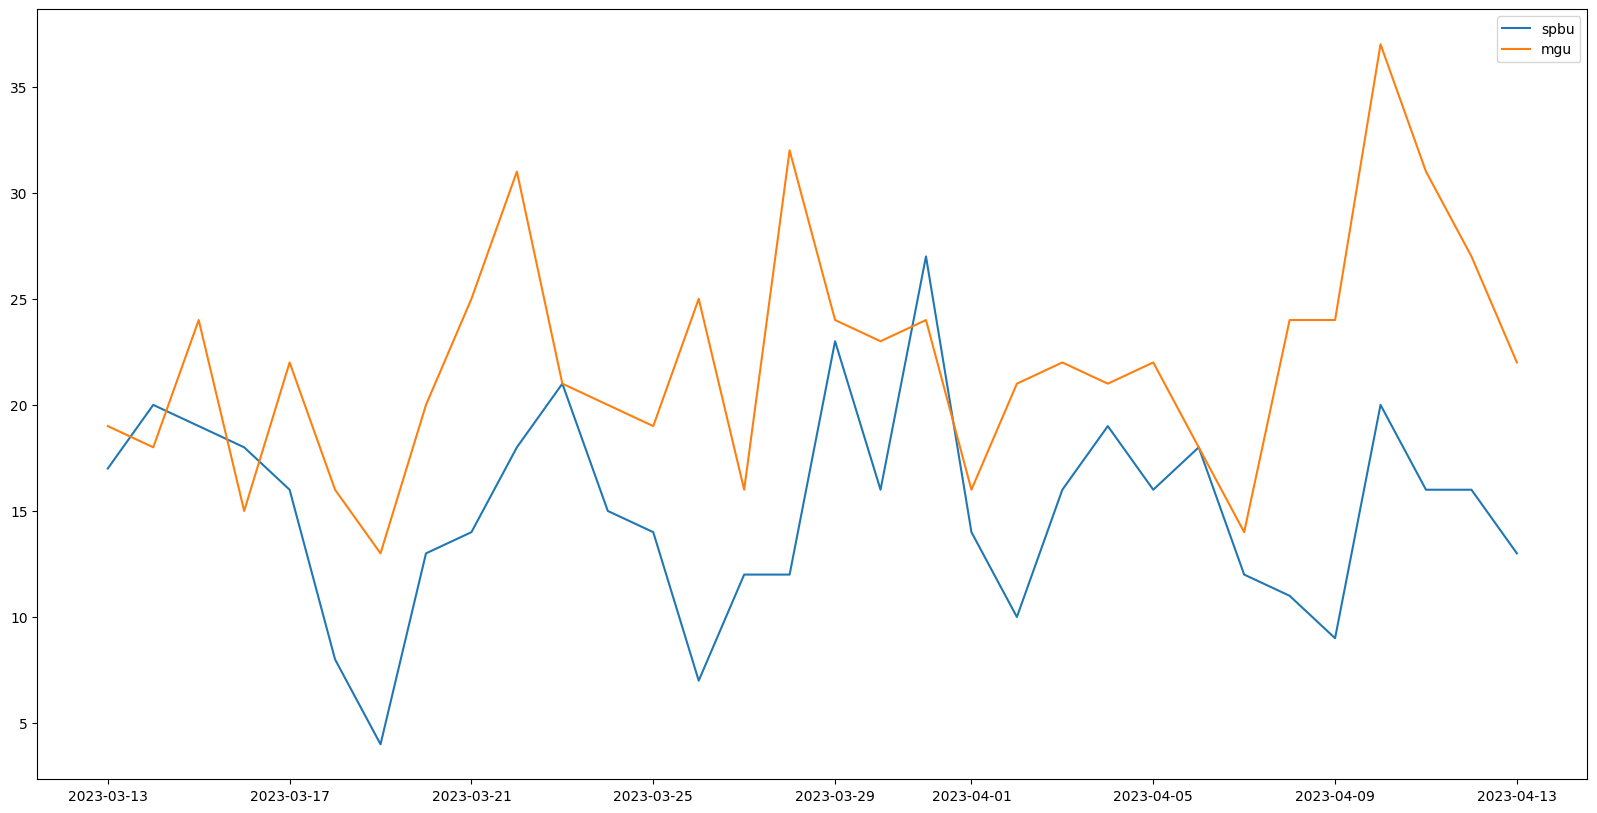

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
gr = df_spbu.groupby(df_spbu.simple_date).count().reset_index()
plt.plot(gr.simple_date, gr.post_id, label="spbu")

gr1 = df_mgu.groupby(df_mgu.simple_date).count().reset_index()
plt.plot(gr1.simple_date, gr1.post_id, label="mgu")

plt.legend()
plt.show()
